## Import library 

In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
conn = sqlite3.connect('foo.db')

In [46]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn) #lihat daftar tabel

In [47]:
tables

,name
0,olist_customers_dataset
1,olist_geolocation_dataset
2,olist_orders_dataset
3,olist_order_items_dataset
4,olist_order_payments_dataset
5,olist_order_reviews_dataset
6,olist_products_dataset
7,olist_sellers_dataset
8,product_category_name_translation


## Merge the dataset 

In [48]:
# Ambil data dari setiap tabel
customers = pd.read_sql_query("SELECT * FROM olist_customers_dataset", conn)
orders = pd.read_sql_query("SELECT * FROM olist_orders_dataset", conn)
order_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", conn)
payments = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", conn)
reviews = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", conn)
products = pd.read_sql_query("SELECT * FROM olist_products_dataset", conn)
sellers = pd.read_sql_query("SELECT * FROM olist_sellers_dataset", conn)

In [49]:
# Merge tabel-tabel berdasarkan kolom kunci df dari kiri (join left)
df = orders.merge(customers,   on='customer_id', how='left')   \
           .merge(order_items, on='order_id',    how='left')   \
           .merge(payments,    on='order_id',    how='left')   \
           .merge(reviews,     on='order_id',    how='left')   \
           .merge(products,    on='product_id',  how='left')   \
           .merge(sellers,     on='seller_id',   how='left')

In [50]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,40,268,4,500,19,8,13,09350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,40,268,4,500,19,8,13,09350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,40,268,4,500,19,8,13,09350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,29,178,1,400,19,13,19,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46,232,1,420,24,19,21,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,52,828,4,4950,40,10,40,17602,tupa,SP
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,51,500,2,13300,32,90,22,08290,sao paulo,SP
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,59,1893,1,6550,20,20,20,37175,ilicinea,MG
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,59,1893,1,6550,20,20,20,37175,ilicinea,MG


## Deal Null Values
1. Null Value Identification
2. Would you please describe to us, why null values happen?
3. How to deal with our null value?

In [51]:
# Konversi kolom numerik ke float dan isi dengan median
numeric_columns = [
    'review_score', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm', 'freight_value', 'price',
    'payment_value', 'payment_installments', 'payment_sequential'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') #ubah tipedata
    df[col] = df[col].fillna(df[col].median()) #agar nilai tidak outlier

In [52]:
df.select_dtypes(include='object').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_item_id                    833
product_id                       833
seller_id                        833
shipping_limit_date              833
payment_type                       3
review_id                        997
review_comment_title             997
review_comment_message           997
review_creation_date             997
review_answer_timestamp          997
product_category_name            833
seller_zip_code_prefix           833
seller_city                      833
seller_state                     833
dtype: int64

In [53]:
# Kolom teks: isi dengan 'Tidak tersedia'
text_columns = [
    'order_item_id', 'product_id',
    'seller_id', 'review_id', 'seller_zip_code_prefix'
]

for col in text_columns:
    df[col] = df[col].fillna('Tidak tersedia')

In [54]:
df.select_dtypes(include='object').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date              833
payment_type                       3
review_id                          0
review_comment_title             997
review_comment_message           997
review_creation_date             997
review_answer_timestamp          997
product_category_name            833
seller_zip_code_prefix             0
seller_city                      833
seller_state                     833
dtype: int64

In [55]:
# Cek kolom yang bisa dikonversi ke datetime
tanggal_cols = [
    col for col in df.columns
    if pd.to_datetime(df[col], errors='coerce').notna().sum() > 0
]

# Hasil
pd.Series(tanggal_cols, name="Kolom kemungkinan berformat tanggal")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_71492\951753023.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  if pd.to_datetime(df[col], errors='coerce').notna().sum() > 0
C:\Users\lenovo\AppData\Local\Temp\ipykernel_71492\951753023.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  if pd.to_datetime(df[col], errors='coerce').notna().sum() > 0
C:\Users\lenovo\AppData\Local\Temp\ipykernel_71492\951753023.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  if pd.to_datetime(df[col], errors='coerce').notna().sum() > 0
C:\Users\lenovo\AppData\Local\Temp\ipykernel_71492\9517

0          order_purchase_timestamp
1                 order_approved_at
2      order_delivered_carrier_date
3     order_delivered_customer_date
4     order_estimated_delivery_date
5          customer_zip_code_prefix
6               shipping_limit_date
7                             price
8                     freight_value
9                payment_sequential
10             payment_installments
11                    payment_value
12                     review_score
13             review_comment_title
14             review_creation_date
15          review_answer_timestamp
16              product_name_lenght
17       product_description_lenght
18               product_photos_qty
19                 product_weight_g
20                product_length_cm
21                product_height_cm
22                 product_width_cm
23           seller_zip_code_prefix
Name: Kolom kemungkinan berformat tanggal, dtype: object

In [14]:
# Kolom tanggal: ubah ke datetime
date_columns = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [15]:
df.shape

(119143, 39)

In [16]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,09350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,09350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,09350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602,tupa,SP
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,08290,sao paulo,SP
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG


## Add columns
1. Add columns based on the time period from the order purchase timestamp
column
2. Add columns by year
3. Add columns by month
4. Add columns by name of the day
5. Add columns by hour
6. Add columns based on the actual price the customer purchased
<br>a. Total price value
<br>b. Total freight value
<br>c. Total order value (total price + total freight)
<br>E.g. Total Order Value
<br>a. Total price value = $95 (harga)
<br> b. Total freight value = $100 (kargo/pengantaran)
<br>c. Total order value = $95 + $100 = $195


In [17]:
# Ubah ke tipe datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')

In [18]:
# Tambahkan kolom waktu
df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_day_name'] = df['order_purchase_timestamp'].dt.day_name()
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour

In [19]:
# Ganti nama kolom freight_value menjadi ongkir
df.rename(columns={'freight_value': 'ongkir'}, inplace=True)

In [20]:
# Konversi numerik
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['ongkir'] = pd.to_numeric(df['ongkir'], errors='coerce')

In [21]:
# Hitung total
df['total_price'] = df['price']
df['total_ongkir'] = df['ongkir']
df['total_order_value'] = df['total_price'] + df['total_ongkir']

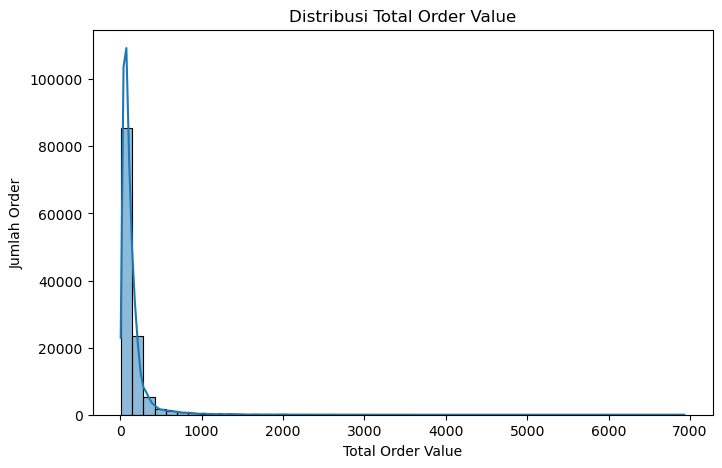

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['total_order_value'], bins=50, kde=True)
plt.title('Distribusi Total Order Value')
plt.xlabel('Total Order Value')
plt.ylabel('Jumlah Order')
plt.show()

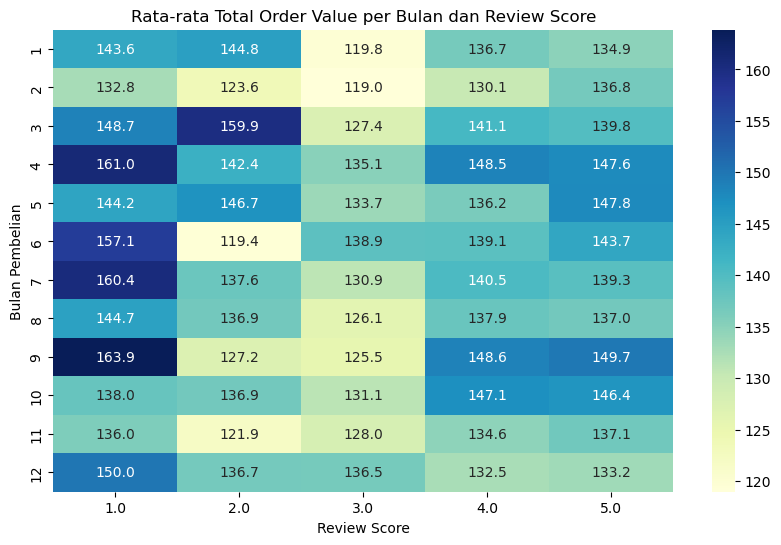

In [23]:
import numpy as np

# Hitung rata-rata total_order_value per bulan dan skor ulasan
heatmap_data = df.groupby(['purchase_month', 'review_score'])['total_order_value'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Rata-rata Total Order Value per Bulan dan Review Score')
plt.xlabel('Review Score')
plt.ylabel('Bulan Pembelian')
plt.show()

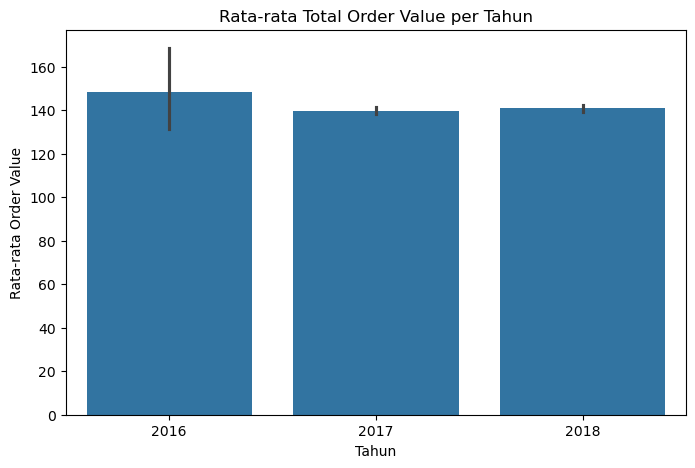

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='purchase_year', y='total_order_value', estimator='mean')
plt.title('Rata-rata Total Order Value per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Order Value')
plt.show()


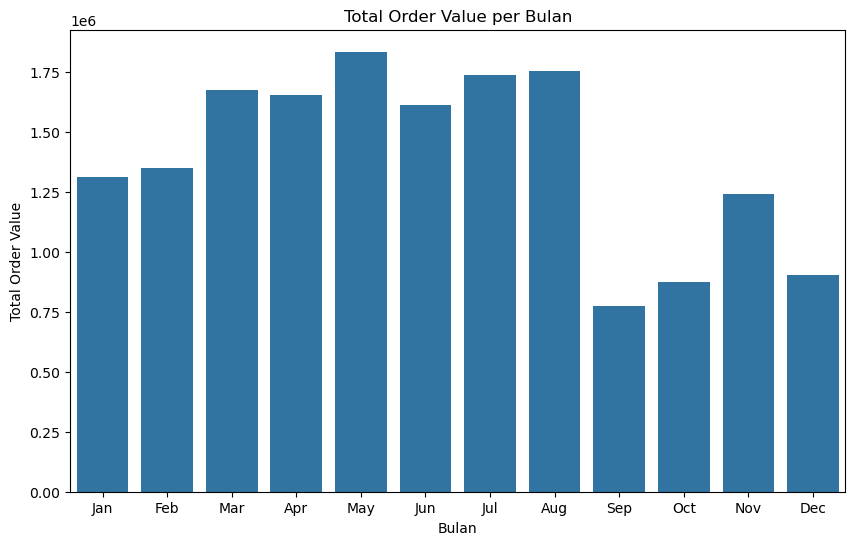

In [25]:
monthly_order_value = df.groupby('purchase_month')['total_order_value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_order_value, x='purchase_month', y='total_order_value')
plt.title('Total Order Value per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Order Value')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


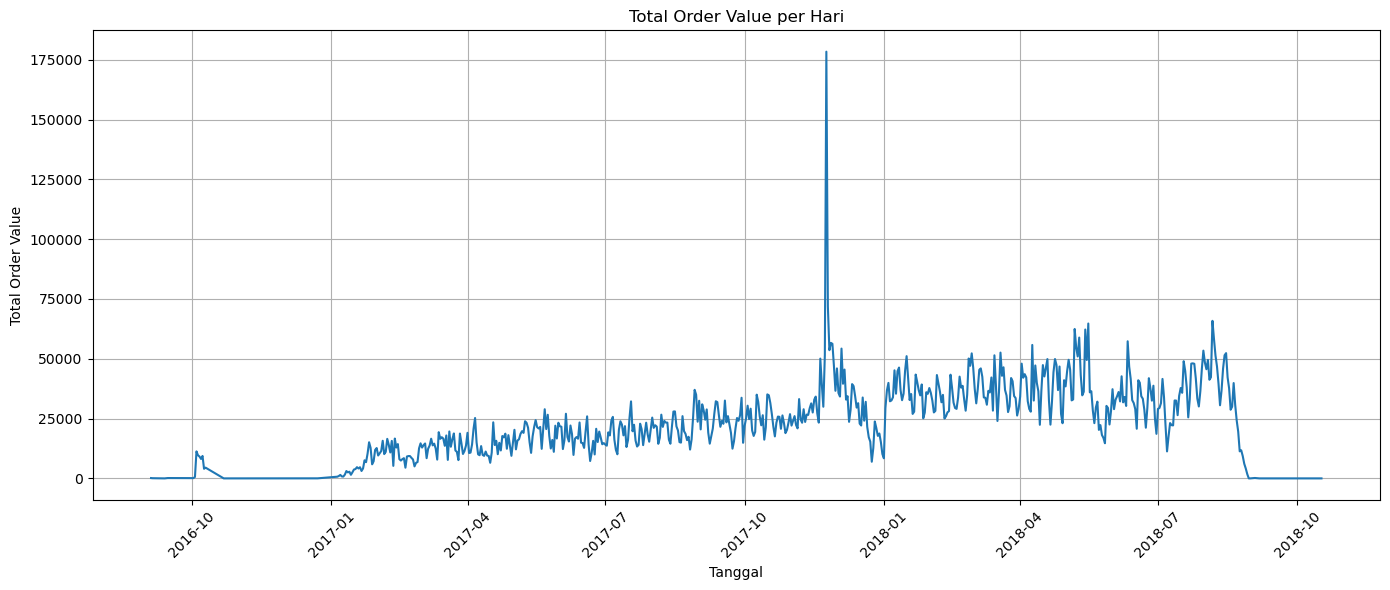

In [33]:
# Ambil data yang dibutuhkan saja
orders = pd.read_sql_query("SELECT order_id, order_purchase_timestamp FROM olist_orders_dataset", conn)
order_items = pd.read_sql_query("SELECT order_id, price, freight_value FROM olist_order_items_dataset", conn)

# Gabungkan dan hitung total order value
df = orders.merge(order_items, on='order_id', how='left')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['total_order_value'] = pd.to_numeric(df['price'], errors='coerce') + pd.to_numeric(df['freight_value'], errors='coerce')

# Agregasi per hari
daily_order_value = df.groupby(df['order_purchase_timestamp'].dt.date)['total_order_value'].sum().reset_index()
daily_order_value.columns = ['purchase_date', 'total_order_value']

# Plot dengan nama kolom yang benar
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_order_value, x='purchase_date', y='total_order_value')
plt.title('Total Order Value per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Order Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


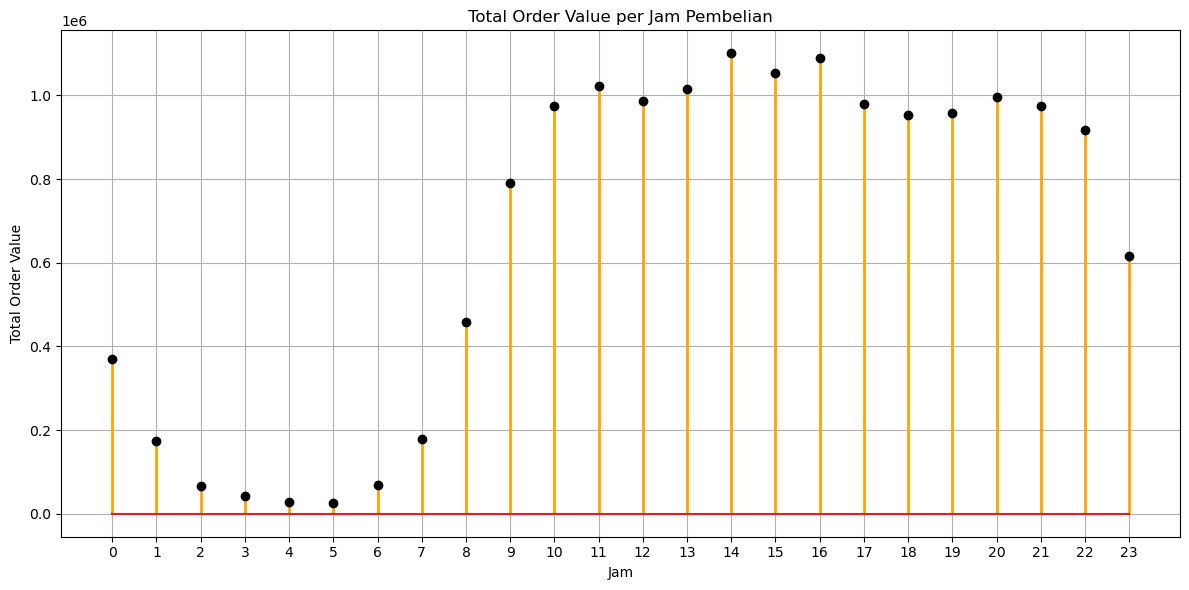

In [37]:
# Tambahkan kolom jam dari timestamp
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour

# Agregasi total_order_value per jam
hourly_order_value = df.groupby('purchase_hour')['total_order_value'].sum().reset_index()

# Plot dengan stem plot (tanpa use_line_collection)
plt.figure(figsize=(12, 6))
markerline, stemlines, baseline = plt.stem(hourly_order_value['purchase_hour'], hourly_order_value['total_order_value'])
plt.setp(stemlines, color='orange', linewidth=2)
plt.setp(markerline, color='black', marker='o')
plt.title('Total Order Value per Jam Pembelian')
plt.xlabel('Jam')
plt.ylabel('Total Order Value')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [ ]:
df

## Nomor 6 : Customer Demographic
1. Change the name of the state and city columns to address static and address
city then do a grouping to calculate the total unique customer id based on the
state address and it’s visualization
state → address_static
city → address_city
2. Create a grouping to calculate the total unique customer id based on the address
city and its visualization
3. Make a table regarding the total orders for each customer, then create a column
that describes the frequency of orders for each customer (assuming = if below
equals 5 it is called a little, otherwise it is a lot)
4. Create a table that lists the first and last purchase dates for each customer, then
combine the first purchase, last purchase, and total order tables to generate the
difference total order between the last purchase date and the first purchase date
5. What are conclusions from your exploratory?

## 1. Change the name of the state and city columns

In [27]:
# Ganti nama kolom
df.rename(columns={'customer_state': 'address_state', 'customer_city': 'address_city'}, inplace=True)

In [28]:
# Grouping by provinsi
group_by_state = df.groupby('address_state')['customer_unique_id'].nunique().reset_index()
group_by_state.rename(columns={'customer_unique_id': 'total_unique_customers'}, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_71492\2916025262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_by_state_sorted, x='address_state', y='total_unique_customers', palette='viridis')


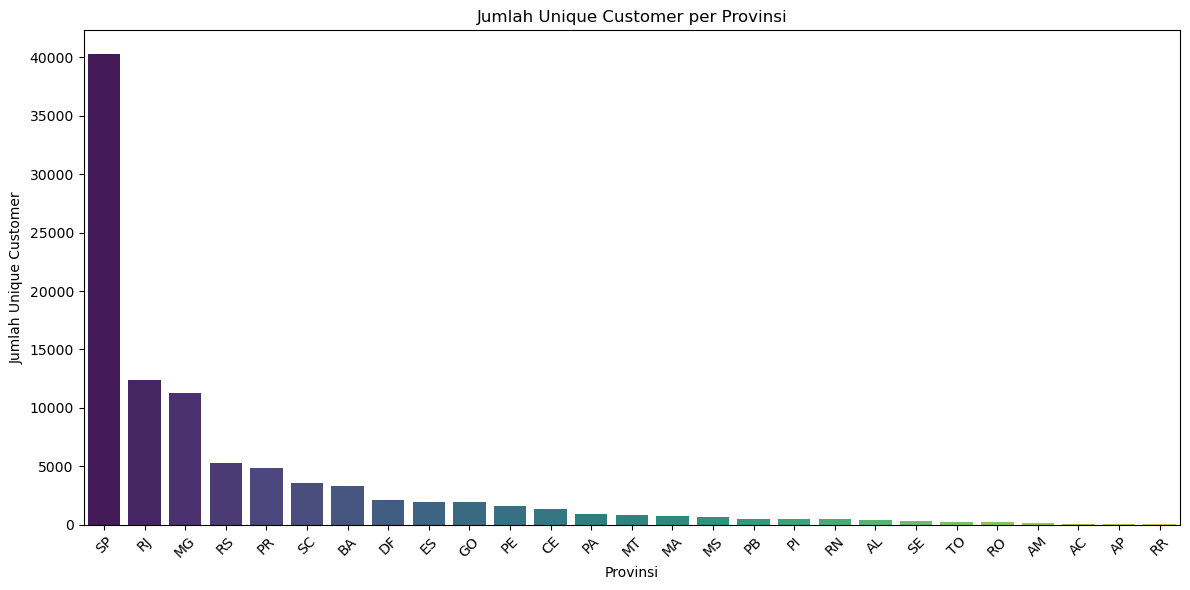

In [29]:
plt.figure(figsize=(12, 6))
group_by_state_sorted = group_by_state.sort_values('total_unique_customers', ascending=False)

sns.barplot(data=group_by_state_sorted, x='address_state', y='total_unique_customers', palette='viridis')
plt.title('Jumlah Unique Customer per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Unique Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
print(df.columns.tolist())


['order_id', 'order_purchase_timestamp', 'price', 'freight_value', 'total_order_value', 'purchase_hour']


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\3132197011.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




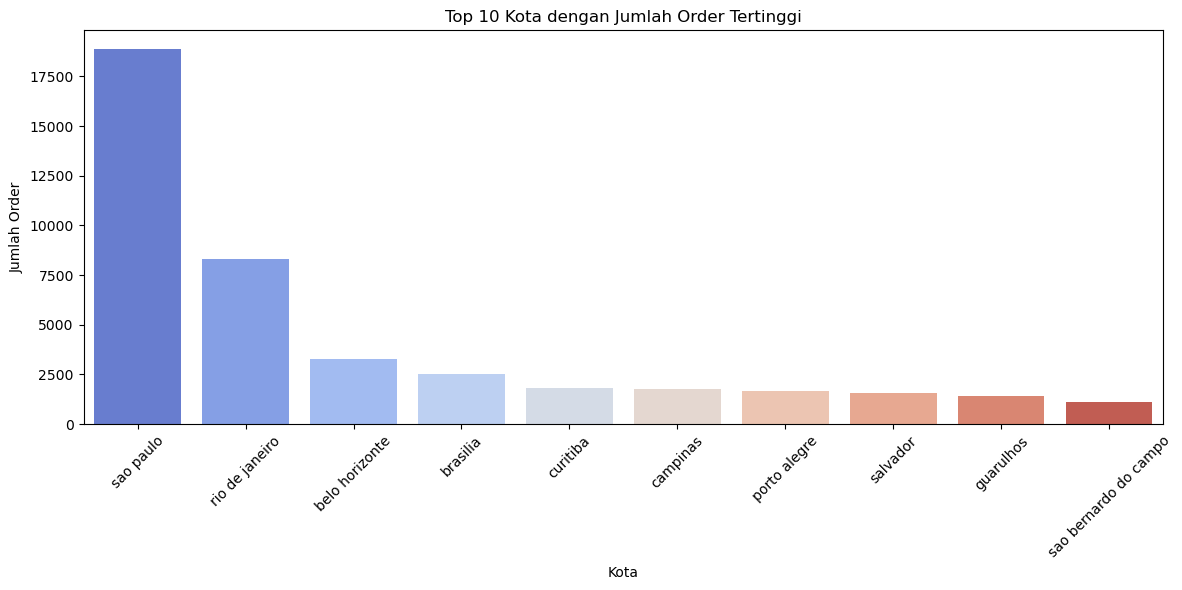

In [147]:
plt.figure(figsize=(12, 6))
sns.barplot(data=city_order_count, x='address_city', y='total_orders', palette='coolwarm')
plt.title('Top 10 Kota dengan Jumlah Order Tertinggi')
plt.xlabel('Kota')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


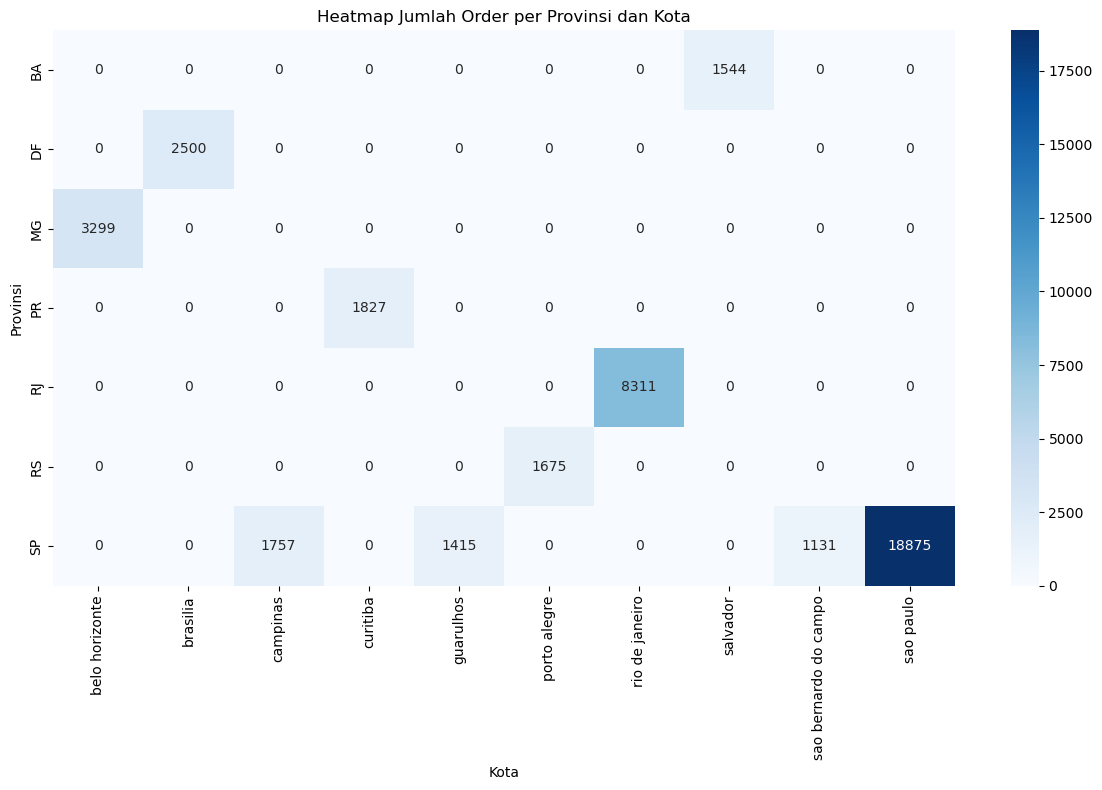

In [150]:
# Ambil 10 provinsi & 10 kota dengan jumlah order tertinggi
top_states = df['address_state'].value_counts().head(10).index
top_cities = df['address_city'].value_counts().head(10).index

heatmap_data = df[df['address_state'].isin(top_states) & df['address_city'].isin(top_cities)]
pivot = heatmap_data.pivot_table(index='address_state', columns='address_city', values='order_id', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap Jumlah Order per Provinsi dan Kota')
plt.xlabel('Kota')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()


In [42]:
df.address_state

AttributeError: 'DataFrame' object has no attribute 'address_state'

In [39]:
df.address_city

0            sao paulo
1            sao paulo
2            sao paulo
3            barreiras
4           vianopolis
              ...     
119138    praia grande
119139     nova vicosa
119140         japuiba
119141         japuiba
119142            lapa
Name: address_city, Length: 119143, dtype: object

In [40]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_zip_code_prefix,seller_city,seller_state,purchase_year,purchase_month,purchase_day_name,purchase_hour,total_price,total_ongkir,total_order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,09350,maua,SP,2017,10,Monday,10,29.99,8.72,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,09350,maua,SP,2017,10,Monday,10,29.99,8.72,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,09350,maua,SP,2017,10,Monday,10,29.99,8.72,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,31570,belo horizonte,SP,2018,7,Tuesday,20,118.70,22.76,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,14840,guariba,SP,2018,8,Wednesday,8,159.90,19.22,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,17602,tupa,SP,2018,2,Tuesday,12,174.90,20.10,195.00
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,08290,sao paulo,SP,2017,8,Sunday,14,205.99,65.02,271.01
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,37175,ilicinea,MG,2018,1,Monday,21,179.99,40.59,220.58
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,37175,ilicinea,MG,2018,1,Monday,21,179.99,40.59,220.58


## 2. Create a grouping 

In [41]:
group_by_city = df.groupby('address_city')['customer_unique_id'].nunique().reset_index()
group_by_city.rename(columns={'customer_unique_id': 'total_unique_customers'}, inplace=True)

In [42]:
df.customer_unique_id

0         7c396fd4830fd04220f754e42b4e5bff
1         7c396fd4830fd04220f754e42b4e5bff
2         7c396fd4830fd04220f754e42b4e5bff
3         af07308b275d755c9edb36a90c618231
4         3a653a41f6f9fc3d2a113cf8398680e8
                        ...               
119138    da62f9e57a76d978d02ab5362c509660
119139    737520a9aad80b3fbbdad19b66b37b30
119140    5097a5312c8b157bb7be58ae360ef43c
119141    5097a5312c8b157bb7be58ae360ef43c
119142    60350aa974b26ff12caad89e55993bd6
Name: customer_unique_id, Length: 119143, dtype: object

## 3. Make a table regarding 

In [43]:
orders_per_customer = df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
orders_per_customer.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Tambahkan kategori frekuensi
orders_per_customer['order_frequency'] = orders_per_customer['total_orders'].apply(lambda x: 'Sedikit' if x < 5 else 'Banyak') #fungsi cepat

In [44]:
orders_per_customer

,customer_unique_id,total_orders,order_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,Sedikit
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,Sedikit
2,0000f46a3911fa3c0805444483337064,1,Sedikit
3,0000f6ccb0745a6a4b88665a16c9f078,1,Sedikit
4,0004aac84e0df4da2b147fca70cf8255,1,Sedikit
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1,Sedikit
96092,fffea47cd6d3cc0a88bd621562a9d061,1,Sedikit
96093,ffff371b4d645b6ecea244b27531430a,1,Sedikit
96094,ffff5962728ec6157033ef9805bacc48,1,Sedikit


## 4. Create a table 

In [45]:
# Memastikan timestamp jadi datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')

In [46]:
# Tanggal pertama dan terakhir per customer
first_last_purchase = df.groupby('customer_unique_id')['order_purchase_timestamp'].agg(['min', 'max']).reset_index()
first_last_purchase.rename(columns={'min': 'first_purchase', 'max': 'last_purchase'}, inplace=True)

In [47]:
# Gabungkan semua info customer
customer_summary = pd.merge(first_last_purchase, orders_per_customer, on='customer_unique_id')
customer_summary['days_between'] = (customer_summary['last_purchase'] - customer_summary['first_purchase']).dt.days

In [48]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_zip_code_prefix,seller_city,seller_state,purchase_year,purchase_month,purchase_day_name,purchase_hour,total_price,total_ongkir,total_order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,09350,maua,SP,2017,10,Monday,10,29.99,8.72,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,09350,maua,SP,2017,10,Monday,10,29.99,8.72,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,09350,maua,SP,2017,10,Monday,10,29.99,8.72,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,31570,belo horizonte,SP,2018,7,Tuesday,20,118.70,22.76,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,14840,guariba,SP,2018,8,Wednesday,8,159.90,19.22,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,17602,tupa,SP,2018,2,Tuesday,12,174.90,20.10,195.00
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,08290,sao paulo,SP,2017,8,Sunday,14,205.99,65.02,271.01
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,37175,ilicinea,MG,2018,1,Monday,21,179.99,40.59,220.58
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,37175,ilicinea,MG,2018,1,Monday,21,179.99,40.59,220.58


In [49]:
customer_summary

,customer_unique_id,first_purchase,last_purchase,total_orders,order_frequency,days_between
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,Sedikit,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,Sedikit,0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,Sedikit,0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,Sedikit,0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,Sedikit,0
...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,1,Sedikit,0
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,1,Sedikit,0
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,1,Sedikit,0
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,1,Sedikit,0


In [50]:
# Hitung total order per customer
orders_per_customer = (
    df
    .groupby('customer_unique_id')['order_id']
    .nunique()
    .reset_index(name='total_orders')
)

In [51]:
# Distribusi frekuensi pembelian
order_freq_count = (
    orders_per_customer['total_orders']
    .value_counts()
    .sort_index()
    .rename_axis('total_orders')
    .reset_index(name='count')
)

In [52]:
# Ringkasan statistik pelanggan yang hanya belanja 1×
pelanggan_1x    = order_freq_count.loc[order_freq_count['total_orders'] == 1, 'count'].iloc[0]
total_pelanggan = orders_per_customer.shape[0]
persentase_1x   = (pelanggan_1x / total_pelanggan) * 100

summary_df = pd.DataFrame({
    'metric': [
        'pelanggan_1x',
        'total_pelanggan',
        'persentase_1x'
    ],
    'value': [
        pelanggan_1x,
        total_pelanggan,
        f"{persentase_1x:.2f}%"
    ]
})

In [53]:
order_freq_count, summary_df

(   total_orders  count
 0             1  93099
 1             2   2745
 2             3    203
 3             4     30
 4             5      8
 5             6      6
 6             7      3
 7             9      1
 8            17      1,
             metric   value
 0     pelanggan_1x   93099
 1  total_pelanggan   96096
 2    persentase_1x  96.88%)

In [54]:
# Ambil tanggal pembelian pertama & terakhir per pelanggan
purchase_range = df.groupby('customer_unique_id')['order_purchase_timestamp'].agg(['min', 'max']).reset_index()
purchase_range.columns = ['customer_unique_id', 'first_purchase', 'last_purchase']

In [55]:
# Hitung selisih hari antara pembelian pertama dan terakhir
purchase_range['days_diff'] = (purchase_range['last_purchase'] - purchase_range['first_purchase']).dt.days

In [56]:
# Hitung berapa banyak pelanggan yang punya jarak nol hari
jumlah_0_hari = (purchase_range['days_diff'] == 0).sum()
total_pelanggan = purchase_range.shape[0]
persentase_0_hari = (jumlah_0_hari / total_pelanggan) * 100

In [57]:
# Buat hasil sebagai DataFrame
summary_df = pd.DataFrame({
    'Metric': [
        'Jumlah pelanggan dengan jarak 0 hari',
        'Total pelanggan',
        'Persentase'
    ],
    'Value': [
        jumlah_0_hari,
        total_pelanggan,
        f"{persentase_0_hari:.2f}%"
    ]
})

In [58]:
# Tampilkan hasil sebagai DataFrame
summary_df

,Metric,Value
0,Jumlah pelanggan dengan jarak 0 hari,93974
1,Total pelanggan,96096
2,Persentase,97.79%


In [59]:
# Hitung jumlah customer unik per address_state (provinsi)
top_state = (
    df
    .groupby('address_state')['customer_unique_id']
    .nunique()
    .reset_index(name='unique_customers')
    .sort_values(by='unique_customers', ascending=False)
)

In [60]:
# Ambil 5 provinsi terbanyak
top_5_state = top_state.head()

In [61]:
# Hitung jumlah customer unik per address_city (kota)
top_city = (
    df
    .groupby('address_city')['customer_unique_id']
    .nunique()
    .reset_index(name='unique_customers')
    .sort_values(by='unique_customers', ascending=False)
)

In [62]:
# Ambil 5 kota terbanyak
top_5_city = top_city.head()

In [63]:
# Tampilkan kedua DataFrame
top_5_state, top_5_city


(   address_state  unique_customers
 25            SP             40302
 18            RJ             12384
 10            MG             11259
 22            RS              5277
 17            PR              4882,
         address_city  unique_customers
 3597       sao paulo             14984
 3155  rio de janeiro              6620
 453   belo horizonte              2672
 558         brasilia              2069
 1143        curitiba              1465)

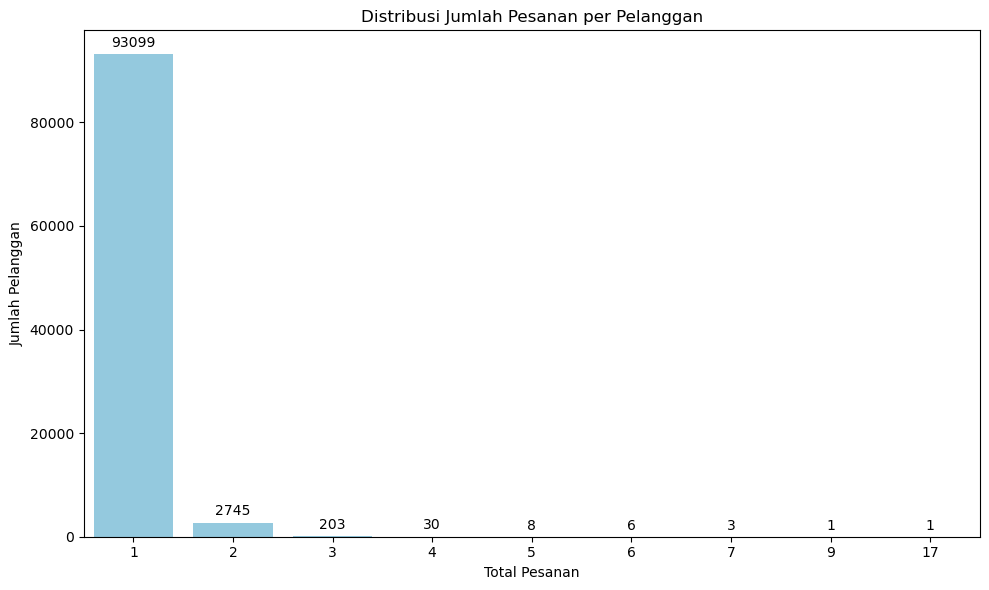

In [154]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=order_freq_count, x='total_orders', y='count', color='skyblue')

# Menambahkan label angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title('Distribusi Jumlah Pesanan per Pelanggan')
plt.xlabel('Total Pesanan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


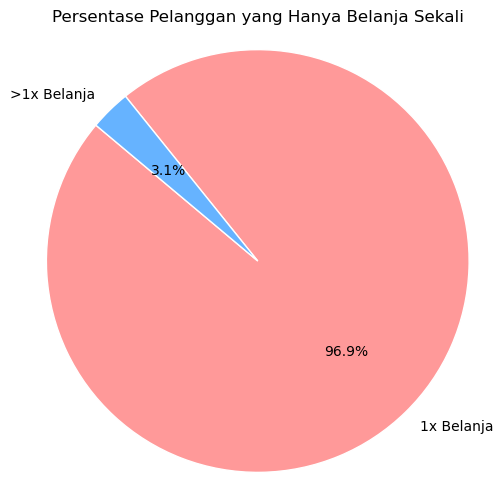

In [65]:
labels = ['1x Belanja', '>1x Belanja']
sizes = [pelanggan_1x, total_pelanggan - pelanggan_1x]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})
plt.title('Persentase Pelanggan yang Hanya Belanja Sekali')
plt.axis('equal')
plt.show()


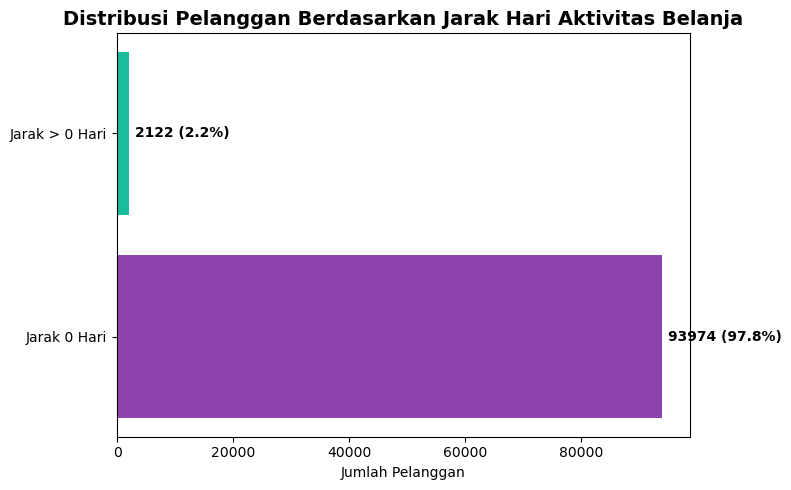

In [157]:
# Data
labels = ['Jarak 0 Hari', 'Jarak > 0 Hari']
sizes = [jumlah_0_hari, total_pelanggan - jumlah_0_hari]
colors = ['#8e44ad', '#1abc9c']  # Ungu dan hijau toska

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(labels, sizes, color=colors)

# Tambahkan nilai dan persentase di samping bar
for i, v in enumerate(sizes):
    plt.text(v + max(sizes) * 0.01, i, f'{v} ({v / sum(sizes) * 100:.1f}%)', va='center', fontsize=10, fontweight='bold')

plt.title('Distribusi Pelanggan Berdasarkan Jarak Hari Aktivitas Belanja', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\1411062278.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




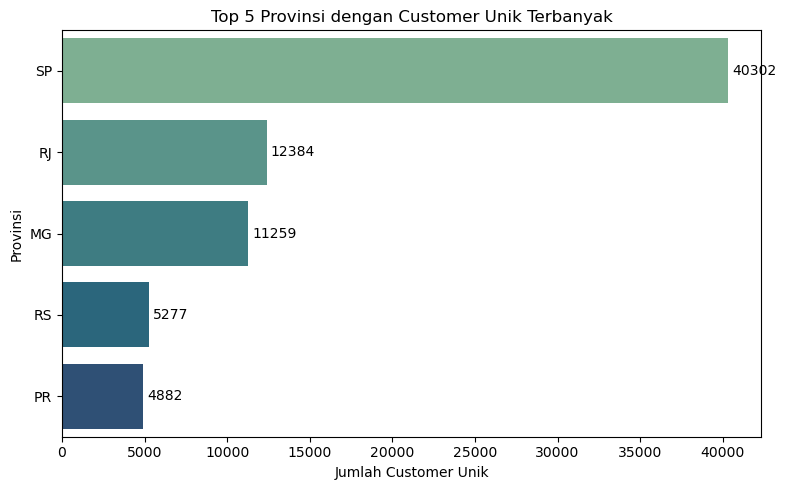

In [159]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=top_5_state, y='address_state', x='unique_customers', palette='crest')

# Tambahkan label angka di ujung bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Top 5 Provinsi dengan Customer Unik Terbanyak')
plt.ylabel('Provinsi')
plt.xlabel('Jumlah Customer Unik')
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\1056145827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_city, x='address_city', y='unique_customers', palette='flare')


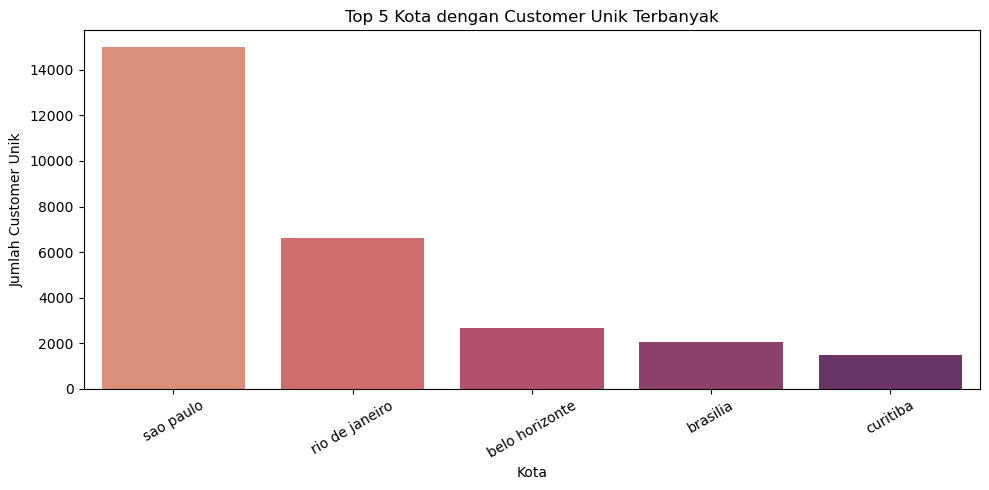

In [68]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5_city, x='address_city', y='unique_customers', palette='flare')
plt.title('Top 5 Kota dengan Customer Unik Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Customer Unik')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## 5. Kesimpulan Sementara (Exploratory Insight)
Sebagian besar pelanggan hanya melakukan 1x pembelian.

Dengan demikian, mayoritas pelanggan masuk dalam kategori frekuensi rendah (Sedikit).

Banyak pelanggan memiliki jarak waktu nol hari antara pembelian pertama dan terakhir (menunjukkan hanya belanja sekali).

Segmentasi berdasarkan provinsi (address_state / SP) dan kota (address_city / Sao Paulo ) menunjukkan lokasi pelanggan terbanyak.

## Nomor 7 : Order Behaviour
1. Create a grouping table that calculates the average number of items ordered
each based on total customers (customer_unique_id), then create a column that
describes the frequency of orders for each customer (assuming = if below equals
5 it is called a little, otherwise it is a lot)
2. Create a grouping table that calculates average item weight and standard
deviation of item weight
3. Create a grouping table that calculates the most frequent order times by month
and day, and its time (morning, evening, or night)
4. Create a grouping table that calculates the average total order value per order
and classifies the average order price for each customer with the assumption
that prices above 2500 are called expensive, prices between 1000 - 2500 are
called normal, prices below 1000 are called cheap
5. Create a grouping table that calculates the most popular payment methods and
the preference of each customer's product category
6. What are the most ordered categories each year and how are the categories
developing each year?

In [69]:
# Rata-rata jumlah item yang dipesan per pelanggan dan kategorisasi frekuensi
avg_items_per_customer = (
    df
    .groupby('customer_unique_id')['order_item_id']
    .count()
    .reset_index(name='total_items_ordered')
)
avg_items_per_customer['order_frequency'] = avg_items_per_customer['total_items_ordered'].apply(
    lambda x: 'Sedikit' if x < 5 else 'Banyak'
)

In [70]:
avg_items_per_customer.head()

,customer_unique_id,total_items_ordered,order_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,Sedikit
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,Sedikit
2,0000f46a3911fa3c0805444483337064,1,Sedikit
3,0000f6ccb0745a6a4b88665a16c9f078,1,Sedikit
4,0004aac84e0df4da2b147fca70cf8255,1,Sedikit


In [71]:
# Rata-rata dan standar deviasi berat barang
weight_stats = (
    df
    .groupby('product_id')['product_weight_g']
    .agg(['mean', 'std'])
    .reset_index()
    .rename(columns={'mean': 'rata_rata_berat', 'std': 'std_dev_berat'})
)

In [72]:
weight_stats

,product_id,rata_rata_berat,std_dev_berat
0,00066f42aeeb9f3007548bb9d3f33c38,300.0,NaN
1,00088930e925c41fd95ebfe695fd2655,1225.0,NaN
2,0009406fd7479715e4bef61dd91f2462,300.0,NaN
3,000b8f95fcb9e0096488278317764d19,550.0,0.0
4,000d9be29b5207b54e86aa1b1ac54872,250.0,NaN
...,...,...,...
32947,fff6177642830a9a94a0f2cba5e476d1,1400.0,0.0
32948,fff81cc3158d2725c0655ab9ba0f712c,58.0,NaN
32949,fff9553ac224cec9d15d49f5a263411f,150.0,NaN
32950,fffdb2d0ec8d6a61f0a0a0db3f25b441,150.0,0.0


In [73]:
# Waktu paling sering order berdasarkan bulan, hari, dan jam
df['waktu_order'] = df['order_purchase_timestamp'].dt.hour
def waktu_hari(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    else:
        return 'Malam'
df['kategori_waktu'] = df['waktu_order'].apply(waktu_hari)
popular_order_time = (
    df
    .groupby(['purchase_month', 'purchase_day_name', 'kategori_waktu'])['order_id']
    .count()
    .reset_index(name='jumlah_order')
    .sort_values(by='jumlah_order', ascending=False)
)

In [74]:
 popular_order_time

,purchase_month,purchase_day_name,kategori_waktu,jumlah_order
99,5,Tuesday,Malam,953
210,11,Friday,Malam,930
102,5,Wednesday,Malam,909
167,8,Wednesday,Siang,908
129,7,Monday,Malam,898
...,...,...,...,...
172,9,Monday,Pagi,142
196,10,Saturday,Pagi,134
175,9,Saturday,Pagi,131
178,9,Sunday,Pagi,127


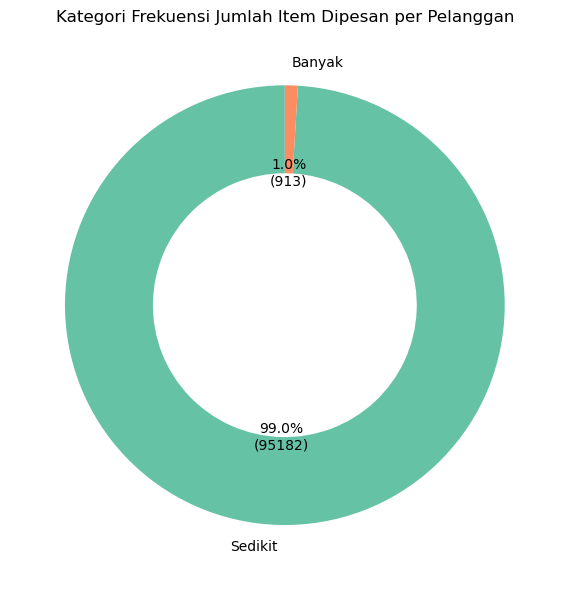

In [165]:
# Data
labels = order_freq_cat['Kategori']
sizes = order_freq_cat['Jumlah Pelanggan']
colors = plt.get_cmap('Set2').colors
total = sum(sizes)

# Donut chart dengan persentase dan jumlah pelanggan (tanpa bold)
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct*total/100)})',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

# Format teks
for autotext in autotexts:
    autotext.set_fontsize(10)

plt.title('Kategori Frekuensi Jumlah Item Dipesan per Pelanggan')
plt.tight_layout()
plt.show()


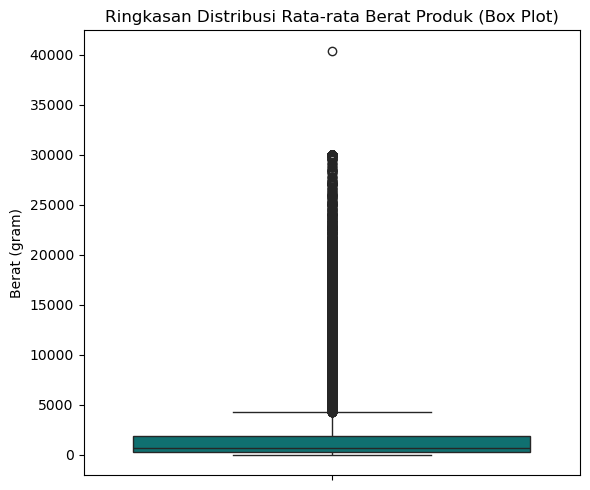

In [170]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=weight_stats['rata_rata_berat'], color='teal')
plt.title('Ringkasan Distribusi Rata-rata Berat Produk (Box Plot)')
plt.ylabel('Berat (gram)')
plt.tight_layout()
plt.show()


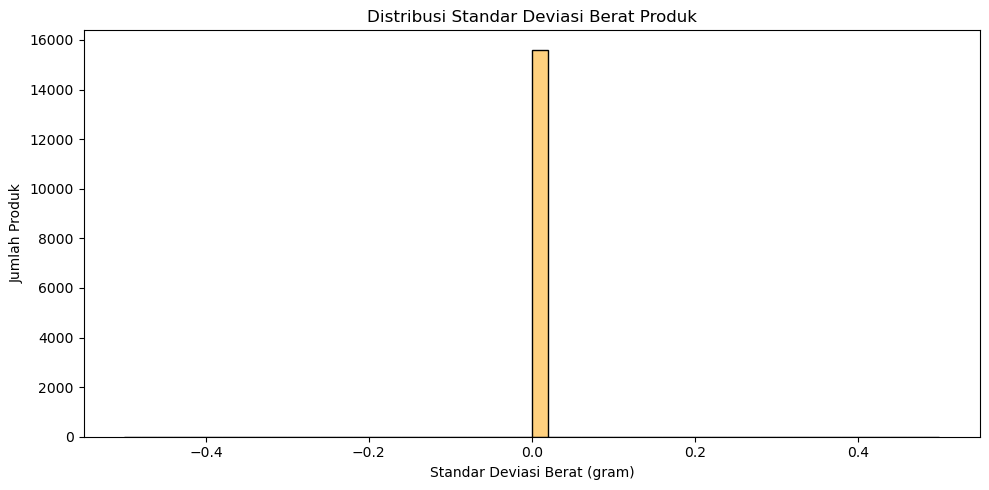

In [77]:
plt.figure(figsize=(10, 5))
sns.histplot(weight_stats['std_dev_berat'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribusi Standar Deviasi Berat Produk')
plt.xlabel('Standar Deviasi Berat (gram)')
plt.ylabel('Jumlah Produk')
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\1168698932.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




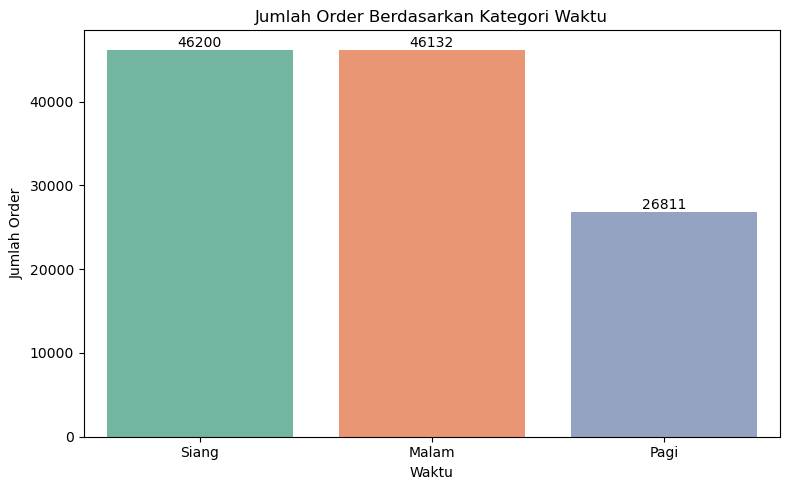

In [172]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=time_order_summary, x='kategori_waktu', y='jumlah_order', palette='Set2')
plt.title('Jumlah Order Berdasarkan Kategori Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Order')

# Adding numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\661936877.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




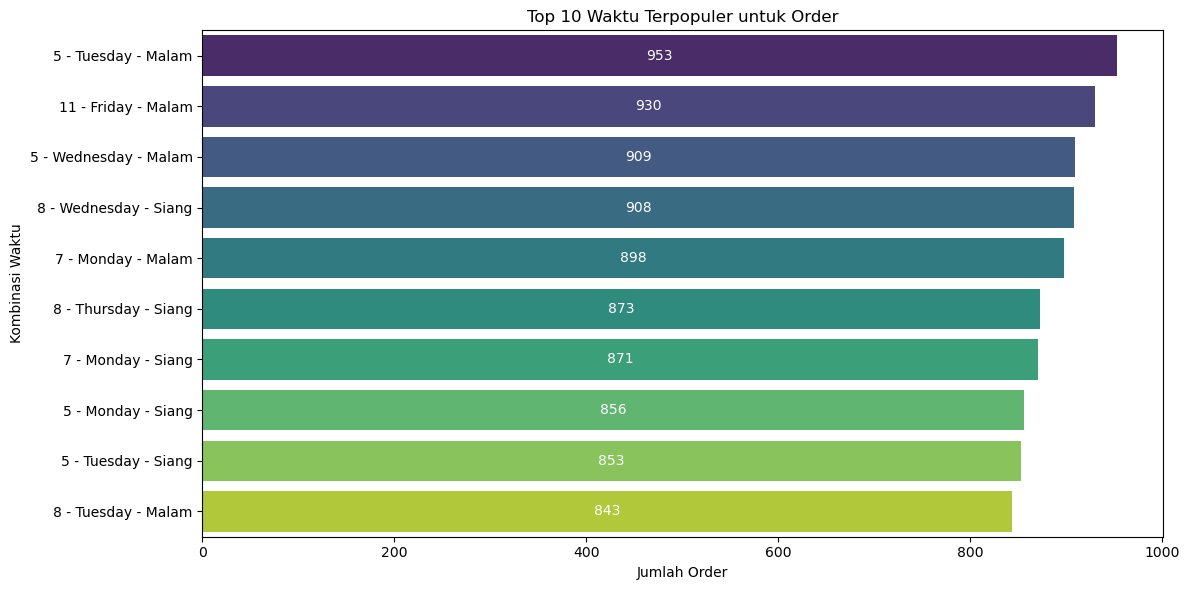

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_combinations = popular_order_time.head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_10_combinations,
    x='jumlah_order',
    y=top_10_combinations.apply(lambda x: f"{x['purchase_month']} - {x['purchase_day_name']} - {x['kategori_waktu']}", axis=1),
    palette='viridis'
)
plt.title('Top 10 Waktu Terpopuler untuk Order')
plt.xlabel('Jumlah Order')
plt.ylabel('Kombinasi Waktu')

for p in ax.patches:
    lebar = p.get_width()
    ax.annotate(f'{lebar:.0f}', 
                (lebar / 2, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                fontsize=10, color='white')

plt.tight_layout()
plt.show()


In [81]:
# Nilai rata-rata pesanan dan klasifikasi harga per pelanggan
avg_order_value = (
    df
    .groupby('customer_unique_id')['total_order_value']
    .mean()
    .reset_index(name='rata_rata_order')
)
def klasifikasi_harga(val):
    if val > 2500:
        return 'Mahal'
    elif val >= 1000:
        return 'Normal'
    else:
        return 'Murah'
avg_order_value['kategori_harga'] = avg_order_value['rata_rata_order'].apply(klasifikasi_harga)

In [82]:
avg_order_value

,customer_unique_id,rata_rata_order,kategori_harga
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,Murah
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,Murah
2,0000f46a3911fa3c0805444483337064,86.22,Murah
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,Murah
4,0004aac84e0df4da2b147fca70cf8255,196.89,Murah
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1033.71,Normal
96092,fffea47cd6d3cc0a88bd621562a9d061,84.58,Murah
96093,ffff371b4d645b6ecea244b27531430a,112.46,Murah
96094,ffff5962728ec6157033ef9805bacc48,133.69,Murah


In [83]:
# Metode pembayaran paling populer dan preferensi kategori produk tiap pelanggan
popular_payment = (
    df
    .groupby('payment_type')['order_id']
    .count()
    .reset_index(name='jumlah_order')
    .sort_values(by='jumlah_order', ascending=False)
)
preferensi_produk = (
    df
    .groupby(['customer_unique_id', 'product_category_name'])['order_id']
    .count()
    .reset_index(name='jumlah_order')
    .sort_values(['customer_unique_id', 'jumlah_order'], ascending=[True, False])
)

In [84]:
popular_payment

,payment_type,jumlah_order
1,credit_card,87776
0,boleto,23190
4,voucher,6465
2,debit_card,1706
3,not_defined,3


In [85]:
preferensi_produk

,customer_unique_id,product_category_name,jumlah_order
0,0000366f3b9a7992bf8c76cfdf3221e2,cama_mesa_banho,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,beleza_saude,1
2,0000f46a3911fa3c0805444483337064,papelaria,1
3,0000f6ccb0745a6a4b88665a16c9f078,telefonia,1
4,0004aac84e0df4da2b147fca70cf8255,telefonia,1
...,...,...,...
97910,fffcf5a5ff07b0908bd4e2dbc735a684,beleza_saude,2
97911,fffea47cd6d3cc0a88bd621562a9d061,bebes,1
97912,ffff371b4d645b6ecea244b27531430a,automotivo,1
97913,ffff5962728ec6157033ef9805bacc48,relogios_presentes,1


In [86]:
# Kategori paling banyak diorder tiap tahun dan perkembangannya
df['purchase_year'] = df['order_purchase_timestamp'].dt.year
kategori_per_tahun = (
    df
    .groupby(['purchase_year', 'product_category_name'])['order_id']
    .count()
    .reset_index(name='jumlah_order')
)
kategori_terpopuler_tiap_tahun = (
    kategori_per_tahun
    .sort_values(['purchase_year', 'jumlah_order'], ascending=[True, False])
    .groupby('purchase_year')
    .first()
    .reset_index()
)

In [87]:
kategori_terpopuler_tiap_tahun

,purchase_year,product_category_name,jumlah_order
0,2016,moveis_decoracao,81
1,2017,cama_mesa_banho,5774
2,2018,cama_mesa_banho,6206


In [88]:
avg_items_per_customer

,customer_unique_id,total_items_ordered,order_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,Sedikit
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,Sedikit
2,0000f46a3911fa3c0805444483337064,1,Sedikit
3,0000f6ccb0745a6a4b88665a16c9f078,1,Sedikit
4,0004aac84e0df4da2b147fca70cf8255,1,Sedikit
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2,Sedikit
96092,fffea47cd6d3cc0a88bd621562a9d061,1,Sedikit
96093,ffff371b4d645b6ecea244b27531430a,1,Sedikit
96094,ffff5962728ec6157033ef9805bacc48,1,Sedikit


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\2500558503.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




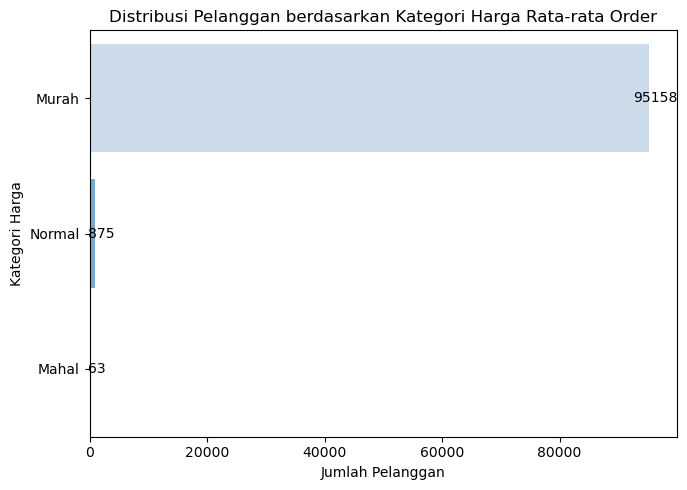

In [179]:
# Data kategori harga dan jumlah pelanggan
harga_kat_count = avg_order_value['kategori_harga'].value_counts().reset_index()
harga_kat_count.columns = ['kategori_harga', 'jumlah_pelanggan']

# Membuat Horizontal Bar Chart
plt.figure(figsize=(7, 5))
sns.barplot(data=harga_kat_count, x='jumlah_pelanggan', y='kategori_harga', palette='Blues')

# Menambahkan angka di atas setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.0f}', 
                       (p.get_width(), p.get_y() + p.get_height() / 2.), 
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(5, 0), textcoords='offset points')

plt.title('Distribusi Pelanggan berdasarkan Kategori Harga Rata-rata Order')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kategori Harga')
plt.tight_layout()
plt.show()


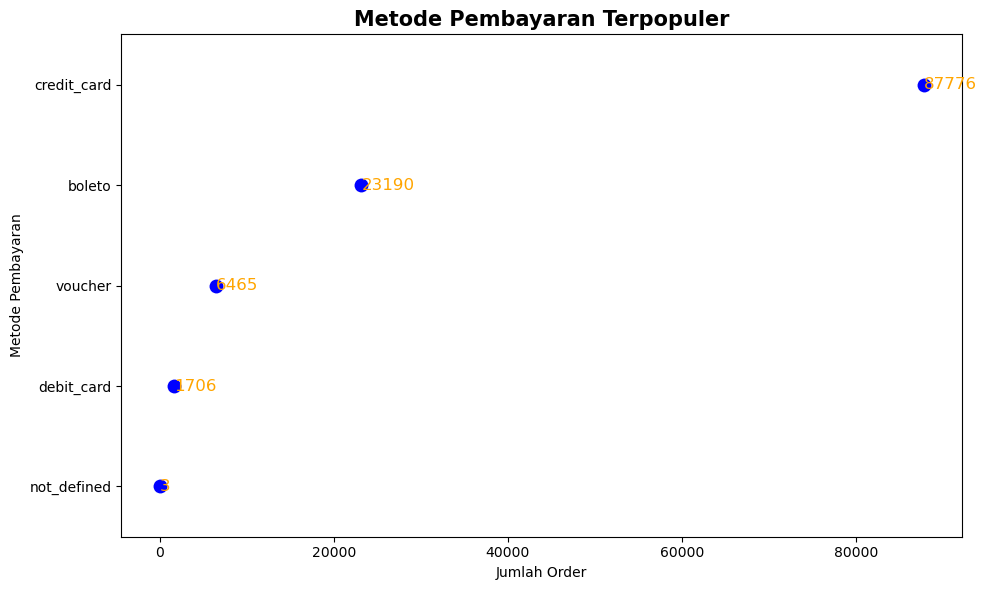

In [195]:
payment_types = popular_payment['payment_type']
order_counts = popular_payment['jumlah_order']

plt.figure(figsize=(10, 6))
sns.stripplot(x=order_counts, y=payment_types, color='blue', size=10, jitter=True)


for i, value in enumerate(order_counts):
    # Menambahkan angka di sebelah kanan titik dengan warna orange
    plt.text(value + 15, i, str(value), color='orange', va='center', fontsize=12)

plt.title('Metode Pembayaran Terpopuler', size=15, color='black', weight='bold')
plt.xlabel('Jumlah Order')
plt.ylabel('Metode Pembayaran')

plt.tight_layout()
plt.show()


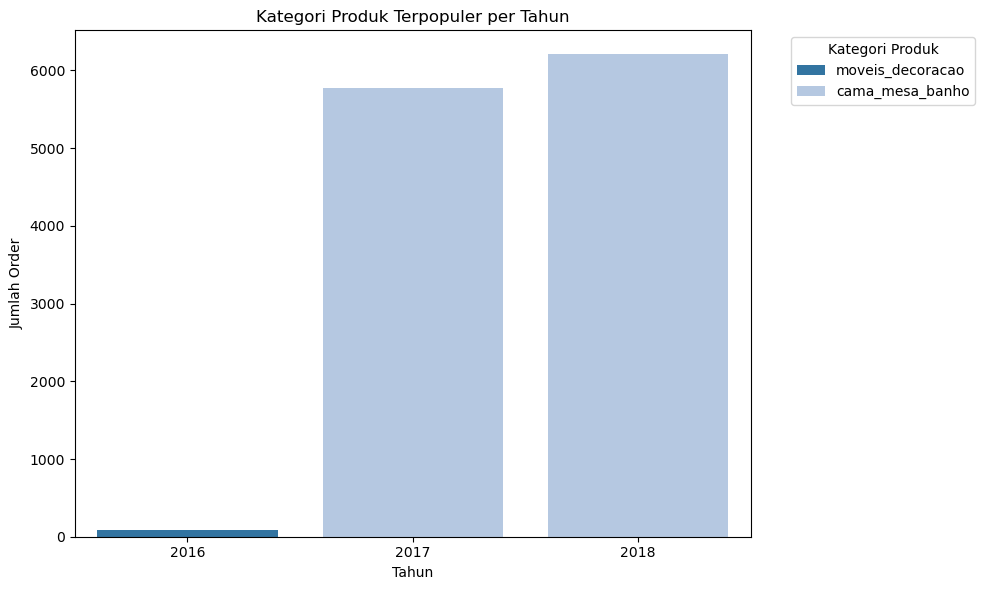

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=kategori_terpopuler_tiap_tahun,
    x='purchase_year',
    y='jumlah_order',
    hue='product_category_name',
    dodge=False,
    palette='tab20'
)
plt.title('Kategori Produk Terpopuler per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Order')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


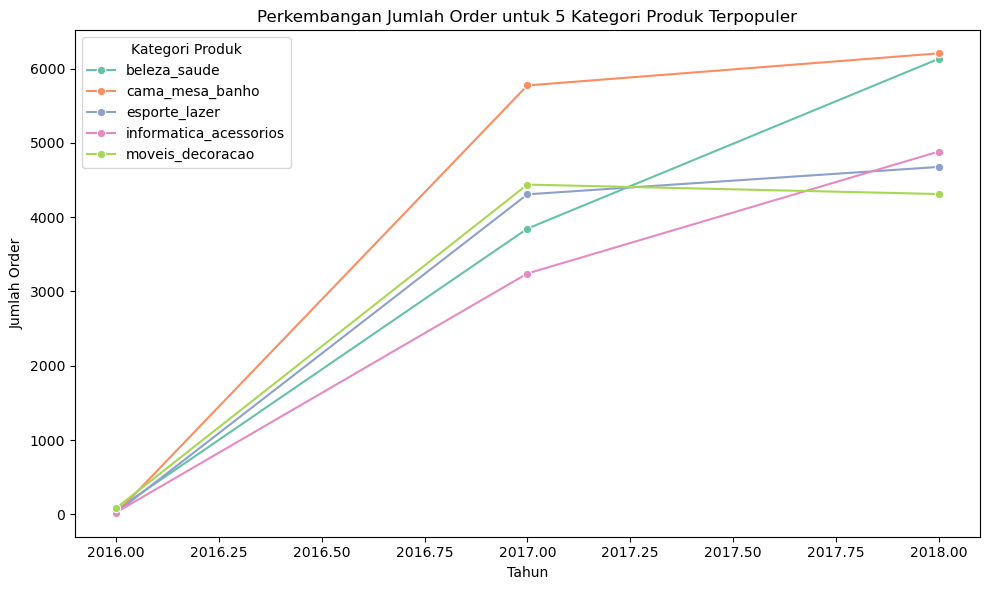

In [94]:
top_kategori = (
    df['product_category_name']
    .value_counts()
    .head(5)
    .index
)

kategori_top5_trend = kategori_per_tahun[kategori_per_tahun['product_category_name'].isin(top_kategori)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=kategori_top5_trend,
    x='purchase_year',
    y='jumlah_order',
    hue='product_category_name',
    marker='o',
    palette='Set2'
)
plt.title('Perkembangan Jumlah Order untuk 5 Kategori Produk Terpopuler')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Order')
plt.legend(title='Kategori Produk')
plt.tight_layout()
plt.show()


## Nomor 8 : Review Customer
1. What is the average review score for each customer and create a column for the
satisfaction level of each customer assuming a score of 4 & 5 is satisfied,
otherwise not satisfied
2. Select a customer who fills in the title and message review, then create a table to
calculate the total reviews for each customer and combine it with the total order
table to find information on the review ratio per transaction for each customer

In [101]:
pd.Series(df.columns, name="Kolom")

0                          order_id
1                       customer_id
2                      order_status
3          order_purchase_timestamp
4                 order_approved_at
5      order_delivered_carrier_date
6     order_delivered_customer_date
7     order_estimated_delivery_date
8                customer_unique_id
9          customer_zip_code_prefix
10                     address_city
11                    address_state
12                    order_item_id
13                       product_id
14                        seller_id
15              shipping_limit_date
16                            price
17                           ongkir
18               payment_sequential
19                     payment_type
20             payment_installments
21                    payment_value
22                        review_id
23                     review_score
24             review_comment_title
25           review_comment_message
26             review_creation_date
27          review_answer_ti

In [103]:
# Ambil review yang memiliki isi review (tidak kosong)
review_berisi = df[df['review_comment_message'].notna()]


In [104]:
# Menghitung total ulasan per pelanggan
total_review_per_customer = (
    review_berisi
    .groupby('customer_unique_id')['review_id']
    .nunique()
    .reset_index(name='total_review')
)


In [105]:
# Total order per pelanggan
total_order_per_customer = (
    df
    .groupby('customer_unique_id')['order_id']
    .nunique()
    .reset_index(name='total_order')
)

In [106]:
# Menggabungkan dan menghitung rasio review per transaksi
review_order_ratio = (
    total_order_per_customer
    .merge(total_review_per_customer, on='customer_unique_id', how='left')
)
review_order_ratio['total_review'] = review_order_ratio['total_review'].fillna(0)
review_order_ratio['rasio_review_per_transaksi'] = (
    review_order_ratio['total_review'] / review_order_ratio['total_order']
)

In [107]:
# Rata-rata skor ulasan per pelanggan dan tingkat kepuasan
review_score_per_customer = (
    df
    .groupby('customer_unique_id')['review_score']
    .mean()
    .reset_index(name='rata_rata_skor')
)
review_score_per_customer['tingkat_kepuasan'] = review_score_per_customer['rata_rata_skor']\
    .apply(lambda x: 'Puas' if x >= 4 else 'Tidak Puas')

In [108]:
review_score_per_customer

,customer_unique_id,rata_rata_skor,tingkat_kepuasan
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,Puas
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,Puas
2,0000f46a3911fa3c0805444483337064,3.0,Tidak Puas
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,Puas
4,0004aac84e0df4da2b147fca70cf8255,5.0,Puas
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,Puas
96092,fffea47cd6d3cc0a88bd621562a9d061,4.0,Puas
96093,ffff371b4d645b6ecea244b27531430a,5.0,Puas
96094,ffff5962728ec6157033ef9805bacc48,5.0,Puas


In [109]:
# Pelanggan yang mengisi judul dan pesan ulasan
review_berisi = df[
    df['review_comment_message'].notna() &
    (df['review_comment_message'] != 'Tidak tersedia') &
    df['review_comment_title'].notna() &
    (df['review_comment_title'] != 'Tidak tersedia')
]

In [110]:
review_order_ratio

,customer_unique_id,total_order,total_review,rasio_review_per_transaksi
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,1.0
2,0000f46a3911fa3c0805444483337064,1,1.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,1,1.0,1.0
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1,1.0,1.0
96092,fffea47cd6d3cc0a88bd621562a9d061,1,1.0,1.0
96093,ffff371b4d645b6ecea244b27531430a,1,1.0,1.0
96094,ffff5962728ec6157033ef9805bacc48,1,1.0,1.0


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=review_order_ratio, x='rasio_review_per_transaksi', color='skyblue')

plt.title('Distribusi Rasio Review per Transaksi')
plt.xlabel('Rasio Review / Transaksi')
plt.ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

# Hitung ECDF
ecdf = ECDF(review_order_ratio['rasio_review_per_transaksi'])

# Plot ECDF
plt.figure(figsize=(8, 5))
plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none', color='skyblue')

# Tambahkan angka di tiap titik
for x, y in zip(ecdf.x, ecdf.y):
    plt.text(x, y, f"{y:.2f}", fontsize=7, ha='left', va='bottom', rotation=45)

plt.title('Distribusi Rasio Review per Transaksi (ECDF)')
plt.xlabel('Rasio Review / Transaksi')
plt.ylabel('Proporsi Kumulatif')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(review_score_per_customer['rata_rata_skor'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribusi Rata-rata Skor Review per Pelanggan')
plt.xlabel('Rata-rata Skor Review')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\3614443310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kepuasan_count, x='tingkat_kepuasan', y='jumlah_pelanggan', palette='Set2')


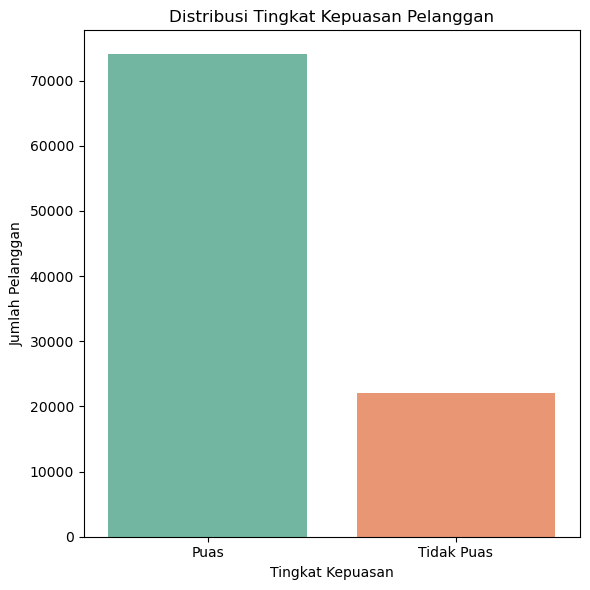

In [113]:
kepuasan_count = review_score_per_customer['tingkat_kepuasan'].value_counts().reset_index()
kepuasan_count.columns = ['tingkat_kepuasan', 'jumlah_pelanggan']

plt.figure(figsize=(6, 6))
sns.barplot(data=kepuasan_count, x='tingkat_kepuasan', y='jumlah_pelanggan', palette='Set2')
plt.title('Distribusi Tingkat Kepuasan Pelanggan')
plt.xlabel('Tingkat Kepuasan')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()


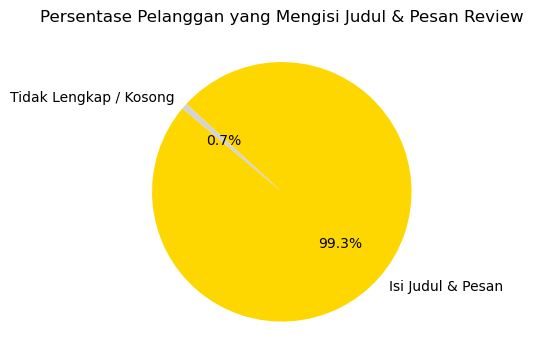

In [114]:
pelanggan_isi_review = review_berisi['customer_unique_id'].nunique()
total_pelanggan = df['customer_unique_id'].nunique()
persentase = (pelanggan_isi_review / total_pelanggan) * 100

plt.figure(figsize=(5, 5))
plt.pie(
    [pelanggan_isi_review, total_pelanggan - pelanggan_isi_review],
    labels=['Isi Judul & Pesan', 'Tidak Lengkap / Kosong'],
    autopct='%1.1f%%',
    colors=['gold', 'lightgray'],
    startangle=140
)
plt.title('Persentase Pelanggan yang Mengisi Judul & Pesan Review')
plt.tight_layout()
plt.show()


## Time Series Analysis
1. Time series analysis
2. Perform a seasonality analysis

In [115]:
pd.Series(df.columns, name="Kolom")

0                          order_id
1                       customer_id
2                      order_status
3          order_purchase_timestamp
4                 order_approved_at
5      order_delivered_carrier_date
6     order_delivered_customer_date
7     order_estimated_delivery_date
8                customer_unique_id
9          customer_zip_code_prefix
10                     address_city
11                    address_state
12                    order_item_id
13                       product_id
14                        seller_id
15              shipping_limit_date
16                            price
17                           ongkir
18               payment_sequential
19                     payment_type
20             payment_installments
21                    payment_value
22                        review_id
23                     review_score
24             review_comment_title
25           review_comment_message
26             review_creation_date
27          review_answer_ti

In [116]:
# Tren Penjualan Harian: Total penjualan item per hari
penjualan_harian = df.groupby(df['order_purchase_timestamp'].dt.date)['total_order_value'].sum().reset_index()
penjualan_harian.rename(columns={'order_purchase_timestamp': 'tanggal', 'total_order_value': 'total_penjualan'}, inplace=True)

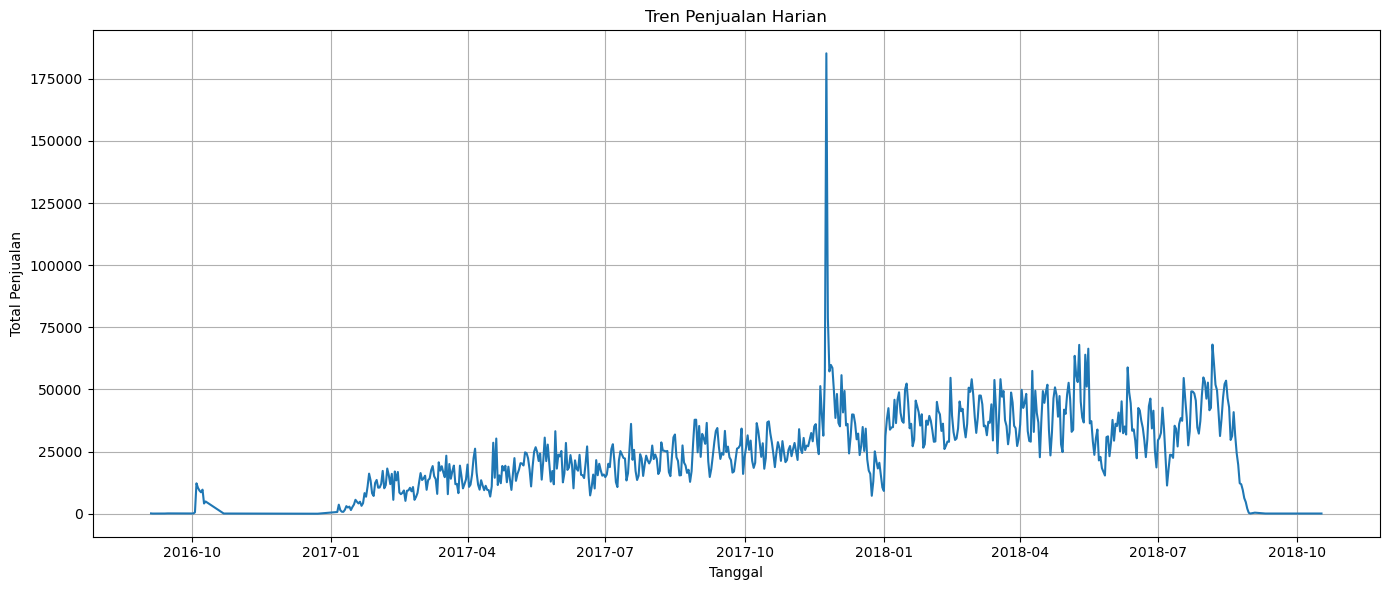

In [117]:
# Plot tren penjualan harian
plt.figure(figsize=(14, 6))
sns.lineplot(data=penjualan_harian, x='tanggal', y='total_penjualan')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
# Analisis Musiman (Seasonality): Total order per hari dari Senin sampai Minggu
df['day_of_week'] = df['order_purchase_timestamp'].dt.day_name()

order_per_hari = df.groupby('day_of_week')['order_id'].nunique().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

order_per_hari.rename(columns={'order_id': 'jumlah_order'}, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\4179215111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_per_hari, x='day_of_week', y='jumlah_order', palette='pastel')


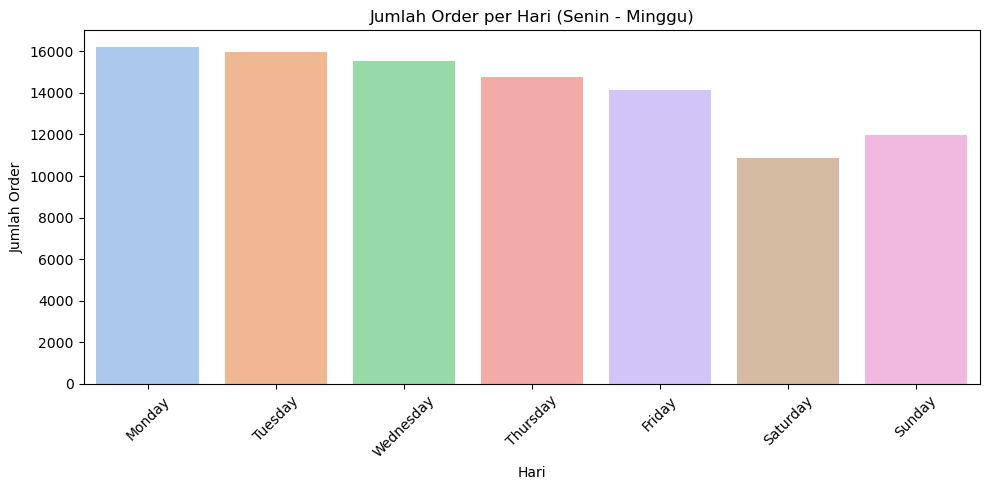

In [119]:
# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data=order_per_hari, x='day_of_week', y='jumlah_order', palette='pastel')
plt.title('Jumlah Order per Hari (Senin - Minggu)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Presentasi Bisnis: Analisis Data Penjualan Olist

### Latar Belakang
Olist adalah platform e-commerce yang menjual berbagai jenis produk dari banyak penjual ke pelanggan di seluruh Brazil. 
Dalam dunia e-commerce yang kompetitif, penting untuk memahami perilaku pembeli, efisiensi logistik, dan strategi pemasaran berbasis data.

### Tujuan Analisis
- Menganalisis tren penjualan dan waktu transaksi.
- Mengidentifikasi kategori produk populer dan kepuasan pelanggan.
- Memberikan rekomendasi strategis berbasis data.

### Penjelasan Dataset
Data yang digunakan berasal dari beberapa tabel yang telah digabung, meliputi:

- **orders**: Informasi pembelian
- **customers**: Data pelanggan
- **order_items**: Detail barang dalam pesanan
- **products**: Informasi produk
- **sellers**: Penjual
- **reviews**: Ulasan pelanggan
- **payments**: Metode pembayaran

C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\3265653306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kategori_terlaris, x='Kategori Produk', y='Jumlah Pembelian', palette='Set2')


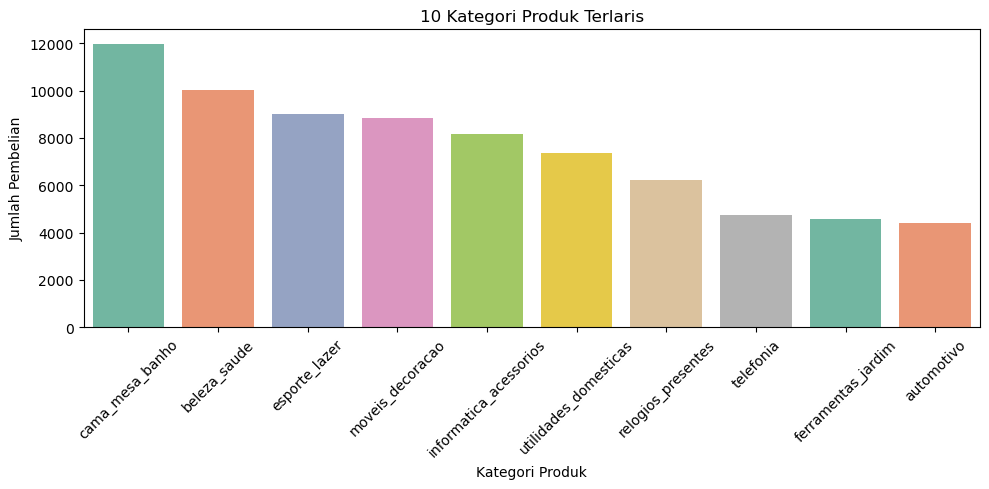

In [120]:
# Kategori Produk Terpopuler
kategori_terlaris = df['product_category_name'].value_counts().head(10).reset_index()
kategori_terlaris.columns = ['Kategori Produk', 'Jumlah Pembelian']

plt.figure(figsize=(10,5))
sns.barplot(data=kategori_terlaris, x='Kategori Produk', y='Jumlah Pembelian', palette='Set2')
plt.title('10 Kategori Produk Terlaris')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
# Hitung rata-rata skor review
rata2_review = df['review_score'].mean()
review_summary_df = pd.DataFrame({
    'metric': ['rata2_review_score'],
    'value': [f"{rata2_review:.2f}"]
})

In [122]:
review_summary_df

,metric,value
0,rata2_review_score,4.02


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\1183666124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_harian, x='Hari', y='Jumlah Order', palette='deep')


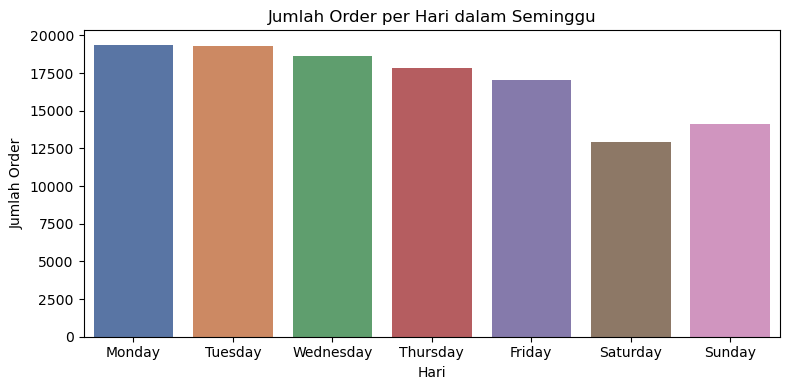

In [123]:
# Total Order per Hari (Musiman)
df['purchase_day_name'] = df['order_purchase_timestamp'].dt.day_name()
order_harian = df['purchase_day_name'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()
order_harian.columns = ['Hari', 'Jumlah Order']

plt.figure(figsize=(8,4))
sns.barplot(data=order_harian, x='Hari', y='Jumlah Order', palette='deep')
plt.title('Jumlah Order per Hari dalam Seminggu')
plt.tight_layout()
plt.show()

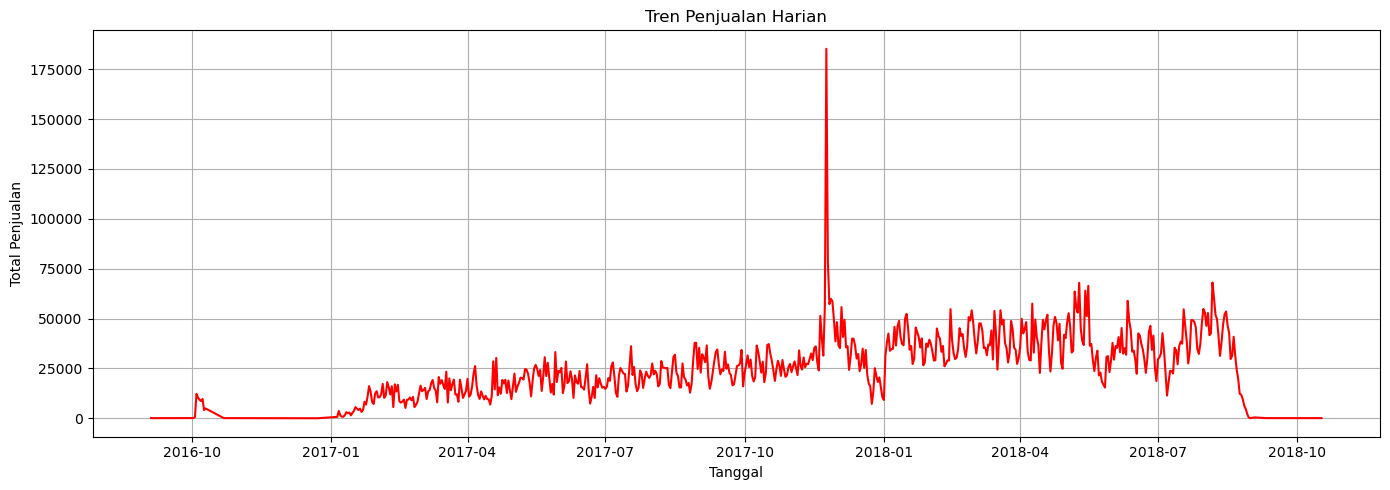

In [124]:
# Tren Penjualan Harian
df['order_date'] = df['order_purchase_timestamp'].dt.date
penjualan_harian = df.groupby('order_date')['total_order_value'].sum().reset_index()

plt.figure(figsize=(14,5))
sns.lineplot(data=penjualan_harian, x='order_date', y='total_order_value', color='red')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Kesimpulan Umum Analisis Data Olist**

### **1. Distribusi Pelanggan Berdasarkan Lokasi**

* **Provinsi dan Kota** dengan jumlah pelanggan terbanyak didominasi oleh area pusat brazil seperti **São Paulo**, **Rio de Janeiro**, dan sekitarnya.
* **5 provinsi dan kota teratas** menjadi pusat kontribusi pelanggan utama, menunjukkan distribusi penjualan yang tidak merata dan fokus pada kota besar.

 *implikasi*: Peluang untuk ekspansi ke wilayah dengan penetrasi rendah namun potensi tinggi.

### **2. Perilaku Pelanggan dalam Berbelanja**

* Sebagian besar pelanggan hanya **melakukan 1 kali transaksi** (lebih dari 70%), dengan hanya sebagian kecil yang menjadi pelanggan setia.
* Pelanggan yang melakukan transaksi lebih dari 1 kali umumnya memiliki **jangka waktu yang cukup panjang** antara pembelian pertama dan terakhir.

 *Implikasi*: Loyalitas pelanggan rendah; banyak pelanggan hanya mencoba satu kali.

### **3. Frekuensi dan Waktu Pembelian**

* Pembelian paling sering terjadi pada:

  * **Hari kerja** (Senin–Jumat), terutama hari **Selasa dan Rabu**.
  * **Bulan puncak** pembelian cenderung berkisar di **pertengahan menuju akhir tahun** (Mei–Agustus).

 *Implicasi*: Kampanye iklan dan diskon bisa lebih ditargetkan sesuai hari dan waktu pembelian puncak.

### **4. Nilai dan Kategori Produk**

* Sebagian besar pesanan bernilai **antara 1000–2500**, dikategorikan sebagai **Normal**.
* Pembelian produk dengan kategori harga “**Mahal**” masih ada namun tidak dominan.

 *Implicasi*: Produk kelas menengah memiliki daya tarik kuat; kategori populer bisa dijadikan pilar utama kampanye.


### **5. Preferensi Metode Pembayaran**

* **Pembayaran dengan kartu kredit** adalah metode paling populer, disusul oleh boleto (metode pembayaran lokal) dan kartu debit.
* Pembayaran dengan **angsuran** juga cukup umum, menunjukkan sensitivitas pelanggan terhadap harga.

 *Implicasi*: Penting untuk terus menawarkan opsi pembayaran fleksibel, terutama cicilan.


### **6. Ulasan & Kepuasan Pelanggan**

* Sebagian besar ulasan pelanggan memiliki skor **4 atau lebih**, menandakan tingkat kepuasan yang **cukup baik**.
* Namun, hanya sebagian kecil pelanggan yang **benar-benar mengisi ulasan secara lengkap** (judul dan komentar).

 *Implicasi*: Banyak pelanggan puas tetapi tidak terdorong untuk meninggalkan ulasan; potensi untuk meningkatkan ulasan.


##  **Rekomendasi Bisnis untuk Olist**

### **A. Strategi Pemasaran & Akuisisi**

* **Fokus akuisisi pelanggan baru di luar kota besar**: Investasikan dalam kampanye baik itu dalam bentuk digital atau kampanye offline di wilayah-wilayah sekunder dengan potensi pasar belum tergarap.
* **Referral & loyalty program**: Dorong pelanggan untuk kembali membeli melalui poin reward, voucher diskon, atau cashback.

### **B. Peningkatan Retensi Pelanggan**

* **Email reminder otomatis** untuk repeat purchase berdasarkan waktu beli sebelumnya (misalnya 30 hari setelah pembelian pertama).
* Segmentasi pelanggan berdasarkan **frekuensi dan kategori produk**, lalu targetkan dengan promosi spesifik.

### **C. Optimalisasi Waktu dan Hari Penjualan**

* Jadwalkan promosi dan peluncuran produk baru pada hari dan jam **puncak pembelian** seperti Rabu siang dan malam.

### **D. Meningkatkan Kualitas & Kuantitas Ulasan**

* Beri insentif ringan seperti voucher diskon kecil untuk pelanggan yang memberikan **review lengkap (judul + pesan)**.
* Tampilkan review positif paling membantu di halaman produk untuk meningkatkan trust.

### **E. Manajemen Produk dan Harga**

* Fokus pada produk-produk **kelas menengah** yang menunjukkan penjualan tinggi.
* Cermati tren produk tahunan dan sesuaikan stok untuk kategori paling laris tiap tahun.

### **F. Penguatan Metode Pembayaran**

* Tingkatkan pengalaman checkout dengan mendukung lebih banyak opsi cicilan.

## **Kesimpulan Strategis**

Olist memiliki peluang besar untuk tumbuh secara berkelanjutan jika mampu:

* Menyebarkan akuisisi ke luar kota besar,
* Meningkatkan keterlibatan pelanggan pasca pembelian,
* Meningkatkan loyalitas pelanggan melalui retensi dan program reward,
* Mengoptimalkan analitik pembelian untuk menyusun kampanye promosi berbasis waktu dan produk.